## 2.1 Random Variables and Probability Distributions

### Probability Distributions of Discrete Random Variables

- Outcomes: the mutually exclusive results of a random process.
- Probability: the proportion that the outcome occurs over a large number of experiments.
- Sample space: the set of all possible outcomes of a random variable.
- Event: a subset of the sample space which consists of one or more outcomes.
- Random variable: a numerical summary of random outcomes (can be discrete or continuous).


- A typical example of a discrete random variable is the result of a dice roll, which randomly selects a sample of size 1 from a sample space of {1,2,3,4,5,6}.


- We can simulate a dice roll using the base rand() function.

In [4]:
print(rand(1:6)) #print a random number from the range of 1 to 6

5

- Probability distribution: a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment.
- Cumulative probability distribution: a mathematical function that provides the probability of a random variable being less than or equal to a particular value.
- Discrete uniform distribution: a probability distribution that places equal probabilities for all equal outcomes.


- A typical example of an experiment with a discrete uniform distribution is a dice roll, as each face has an equal probability of 1/6.


- We can plot the probability distribution and cumulative probability distribution of a dice roll using the plot() function from the Plots package.

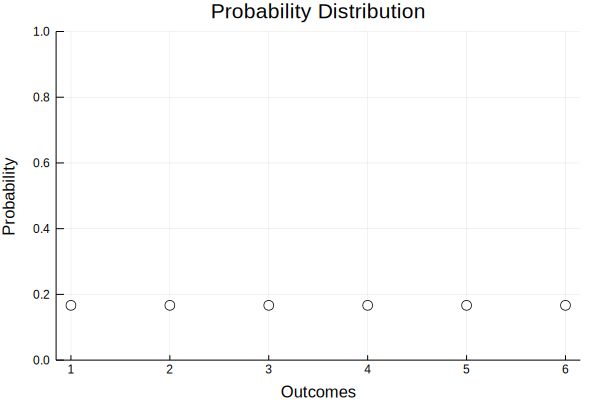

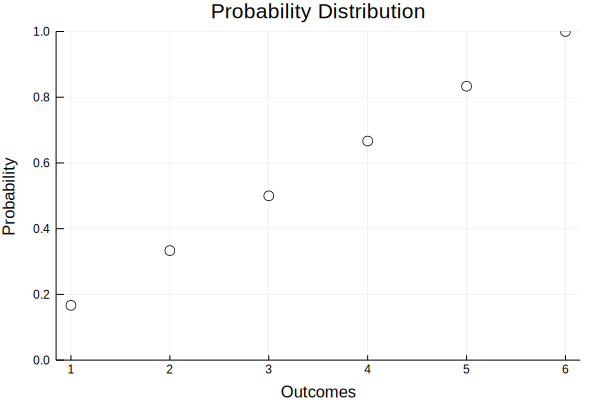

In [22]:
using Plots

faces = 1:6 #set the faces of a dice to be equal to a discrete range from 1 to 6

x = faces #set the x axis to be the faces of a die
y = [1/6 for _ in faces] #set the y axis values to be equal to 1/6 for all the faces on a die

p1 = plot( #assign a plot object to the variable p1 using the following attributes
    x, #x series
    y, #y series
    st = :scatter, #series type
    title = "Probability Distribution", #plot title
    label = [""], #legend labels
    xlabel = "Outcomes", #x axis label
    ylabel = "Probability", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    ms = 5, #marker size
    mc = :white #marker color
)

y = [(1/6 * i) for i in faces] #set the y axis values to be equal to 1/6 * die face value

p2 = plot( #assign a plot object to the variable p2 using the following attributes
    x, #x series
    y, #y series
    st = :scatter, #series type
    title = "Probability Distribution", #plot title
    label = [""], #legend labels
    xlabel = "Outcomes", #x axis label
    ylabel = "Probability", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    ms = 5, #marker size
    mc = :white #marker color
)

display(p1)
display(p2)

#plotsjl cheatsheet: https://github.com/sswatson/cheatsheets/blob/master/plotsjl-cheatsheet.pdf
#plotsjl docs tutorial: https://docs.juliaplots.org/latest/tutorial/

- We can use the simulation of a dice roll to produce a Monte Carlo estimation of the probability of each die face being rolled.
- This is implemented below using the previously demonstrated functions, as well as the base count() function and the base push!() function.
- As it can be seen from the line plot, as the number of experiments increase, the probability of each die face being rolled converges towards 1/6.



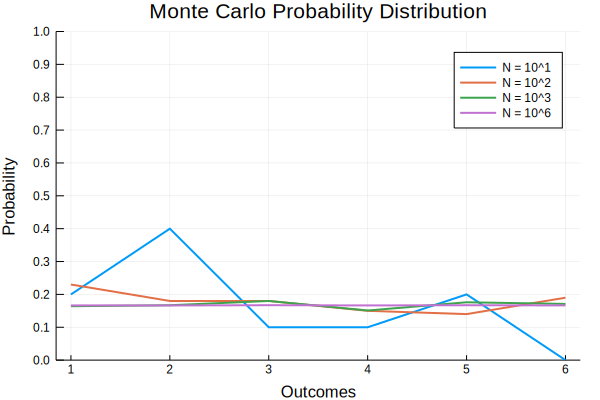

In [34]:
using Plots

faces = 1:6 #set the faces of a dice to be equal to a discrete range from 1 to 6

function monteCarloDiceEstimate(N) #define a function for the Monte Carlo estimated probability of a die face; the parameter N defines the number of dice rolls per estimate
    faceProbabilities = [] #initialise an array that will store the estimated probabilities of each die face
    
    for face in faces #initialise a for loop that will go through through each die face     
        diceRolls = rand(faces, N) #simulate N number of dice rolls and store every result in the array diceRolls
        faceRolls = count(i->(i==face), diceRolls) #count the number of values in diceRolls that are equal to the current die face value 
        faceProbability = faceRolls/N #obtain the probability for the current die face by dividing the number of rolls that matched the current die face by the total number of rolls 
        push!(faceProbabilities, faceProbability) #store the probability for the current die face in the faceProbabilities array (indexes match die face values as earlier calculations are pushed into earlier indexes)
    end #end of for loop
    
    faceProbabilities #return the faceProbabilities array as output, it now contains the estimated probability of each die face occurring based on an N number of dice rolls
end #end of function

x = faces #set the x axis to be the faces of a die
y = [monteCarloDiceEstimate(10^1)] #set the y axis values to be equal to each face's Monte Carlo estimated probability with 10^1 experiments per estimate

p = plot( #assign a plot object to the variable p using the following attributes
    x, #x series
    y, #y series
    st = :line, #series type
    title = "Monte Carlo Probability Distribution", #plot title
    label = "N = 10^1", #legend label
    xlabel = "Outcomes", #x axis label
    ylabel = "Probability", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    lw = 2 #line width
)

y =  monteCarloDiceEstimate(10^2) #set the y axis values to be equal to each face's Monte Carlo estimated probability with 10^2 experiments per estimate

plot!( #modify a given plot using the following attributes
    p, #plot object being modified
    x, #x series
    y, #modified y series to be added to given plot object
    label = "N = 10^2", #legend label for y series to be added
    lw = 2 #line width
)

y = monteCarloDiceEstimate(10^3) #set the y axis values to be equal to each face's Monte Carlo estimated probability with 10^3 experiments per estimate

plot!( #modify a given plot using the following attributes
    p, #plot object being modified
    x, #x series
    y, #modified y series to be added to given plot object
    label = "N = 10^3", #legend label for y series to be added
    lw = 2 #line width
)

y = monteCarloDiceEstimate(10^6) #set the y axis values to be equal to each face's Monte Carlo estimated probability with 10^6 experiments per estimate

plot!( #modify a given plot using the following attributes
    p, #plot object being modified
    x, #x series
    y, #modified y series to be added to given plot object
    label = "N = 10^6", #legend label for y series to be added
    lw = 2 #line width
)


### Bernoulli Trials

- Bernoulli trial (or binomial trial): a random experiment with exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted.
- Bernoulli distribution: the discrete probability distribution of a random variable which takes the values 1 or 0 with probabilities p or q = 1 - p.


- A typical example of a Bernoulli distributed random variable is the result of a coin toss, which randomly selects a sample of size 1 from a sample space of {H,T} (or {0,1}).


- Again, we can simulate a coin toss using the base rand() function.

In [11]:
print(rand(["H","T"])) #print a random character from the sample of "H" or "T"

"T"

- Binomial distribution: the discrete probability distribution of the number of successes in a sequence of n independent Bernoulli experiments, each with its own boolean-valued outcome of 1 or 0 with probabilities p or q = 1 - p.


- The probability of a given number of successes in a series of n Bernoulli experiments with probabilities p or q = 1 - p, k ~ B(n, p), is modelled using a binomial distribution function.

\begin{equation}
f(k)=P(k)=\begin{pmatrix}n\\ k \end{pmatrix} \cdot p^k \cdot(1-p)^{n-k}=\frac{n!}{k!(n-k)!} \cdot p^k \cdot (1-p)^{n-k}
\end{equation}


- We can plot the binomial probability distribution and binomial cumulative distribution of a series of coin toss experiments using the Binomial(), pdf(), and cdf() functions from the Distributions package.

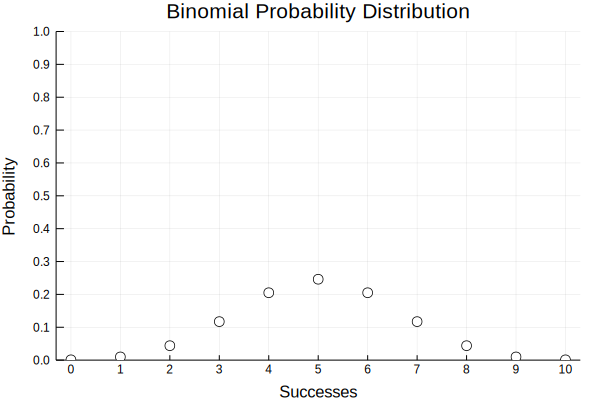

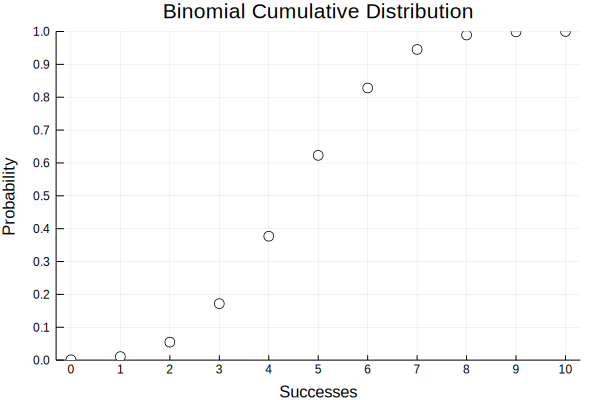

In [15]:
using Distributions
using Plots

n = 10 #define the number of experiments n
p = 0.5 #define the success probability of each experiment p

d = Binomial(n, p) #initialise and define the binomial distribution object using variables n and p

x = 0:n #the x axis is defined to be the entire possible range of the number of successful experiments 
y1 = pdf(d, 0:n) #probability density function applied to the binomial distribution object returns an array of probabilities which is set to be the y axis

p1 = plot( #assign a plot object to the variable p using the following attributes
    x, #x series
    y1, #y series
    st = :scatter, #series type
    title = "Binomial Probability Distribution", #plot title
    label = "", #legend label
    xlabel = "Successes", #x axis label
    xticks = 0:1:10, #x axis tick range
    ylabel = "Probability", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    ms = 5, #marker size
    mc = :white #marker color
)

y2 = cdf(d, 0:n) #cumulative distribution function applied to the binomial distribution object returns an array of probabilities which is set to be the y axis

p2 = plot( #assign a plot object to the variable p using the following attributes
    x, #x series
    y2, #y series
    st = :scatter, #series type
    title = "Binomial Cumulative Distribution", #plot title
    label = "", #legend label
    xlabel = "Successes", #x axis label
    xticks = 0:1:10, #x axis tick range
    ylabel = "Probability", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    ms = 5, #marker size
    mc = :white #marker color
)

display(p1) #display the plot p1
display(p2) #display the plot p2

### Expected Value, Mean and Variance

- Expected value of a random variable: the long-run average value of its outcomes when the number of repeated trials is large.
- Expected value of a discrete random variable: the probability-weighted average of its possible outcomes.

\begin{equation}
E(Y) = y_1 p_1 + y_2 p_2 + \cdots + y_k p_k = \sum_{i=1}^k y_i p_i
\end{equation}

- For a dice roll, a probability-weighted average of all possible outcomes results in a value of 3.5.
- The same result could be obtained by simply taking the mean of all possible outcomes, as the probabilities of the outcomes of a dice roll are all equal to the inverse of the total number of outcomes, 1/6.


- This is simulated below using the base length() and sum() functions

In [44]:
function expectedValue(yArray, pArray) #define a function for calculating the expected value using the probability-weighted average method given an array of values and corresponding probabilities
    ypArray = [] #initialise an array that would store the probability-weighted values
    
    for i in 1:length(yArray) #initialise a for loop that would go through each number i in the range 1 to the length of the given array
        push!(ypArray, yArray[i] * pArray[i]) #multiply each value at index i with its probability at index i and push the result into an array
    end #end of for loop
    
    sum(ypArray) #calculate and return the sum of the array's probability-weighted values
    end #end of function
    
y = 1:6 #set y to be the faces of a die, the range 1 to 6
p = [1/6 for _ in y] #set p to be the probabilities of the faces of a die, 1/6 for each value 1 to 6

print("Using the probability-weighted average method: " * string(expectedValue(y, p))) #print the expected value of a dice roll using the probability-weighted average method
print("\n")
print("Using the mean method: " * string(mean(y))) #print the expected value of a dice roll using the mean method       

Using the probability-weighted average method: 3.5
Using the mean method: 3.5

- Population variance of a discrete random variable Y, denoted $\sigma^2_Y$:
\begin{equation}
\sigma^2_Y = \text{Var}(Y) = E\left[(Y-\mu_y)^2\right] = \sum_{i=1}^k (y_i - \mu_y)^2 p_i
\end{equation}
-  Population variance of a discrete random variable Y when probability is not weighted or if all of the probabilities are equal to p = 1/N:
\begin{equation}
\sigma^2_Y = \frac{1}{N} \sum_{i=1}^N (y_i - \mu_Y)^2.
\end{equation}
- Sample variance of a discrete random variable Y, denoted $\sigma^2_Y$:
\begin{equation}
s^2_Y = \text{Var}(Y) = E\left[(Y-\overline{y})^2\right] = \sum_{i=1}^k (y_i - \overline{y})^2 p_i
\end{equation}
- Sample variance of a discrete random variable Y when probability is not weighted or if all of the probabilities are equal to p = 1/n:
\begin{equation}
s^2_Y = \frac{1}{n-1} \sum_{i=1}^n (y_i - \overline{y})^2.
\end{equation}
- The sample variance is divided by the degrees of freedom (n - 1) to produce an unbiased sample variance.


- We can calculate the sample variance of a dice roll using the base var() function.

In [ ]:
print(var(1:6)) #prints the sample variance of an array containing the values of the range 1 to 6

#For arrays, this computation is equivalent to calculating sum((itr .- mean(itr)).^2) / (length(itr) - 1)).

### Probability Distributions of Continuous Random Variables

- Probability density function (PDF): a function that summarizes the probability distribution of a continuous random variable.
- Cumulative probability distribution function (CDF): a function that summarizes the probability that a discrete/continuous random variable is less than or equal to a particular value.


- Where $f_Y(y)$ denotes the probability density function of Y, the probability that Y falls between a and b where a < b is:
\begin{equation}
P(a \leq Y \leq b) = \int_a^b f_Y(y) \mathrm{d}y.
\end{equation}
- As for the discrete case, the expected value of Y is the probability weighted average of its values. Due to continuity, we use integrals instead of sums. The expected value of Y is defined as:
\begin{equation}
E(Y) =  \mu_Y = \int y f_Y(y) \mathrm{d}y.
\end{equation}
- The variance is the expected value of $(Y - \mu_Y)^2$. We thus have:
\begin{equation}
\text{Var}(Y) =  \sigma_Y^2 = \int (y - \mu_Y)^2 f_Y(y) \mathrm{d}y.
\end{equation}
- Note that the variance of Y is also more conveniently expressed as:
\begin{equation}
\text{Var}(Y) = E(Y^2) - E(Y)^2
\end{equation}


- Example: given a continuous random variable X with probability density function $f_X(x) = \frac{3}{x^4}, x>1$,  we can calculate it's area, expected value, and variance using the quadgk() function from the QuadGK package, which supports one-dimensional numerical integration via. adaptive Gauss-Kronrod quadrature.

In [6]:
using QuadGK

f(x) = 3 / x^4 #define the probability density function of X as f(x)
area = quadgk(f, 1, Inf)[1] 
#integrate the probability density function f(x) over the range 1 to infinity to obtain the probability of X being within 1 to infinity, that is the total area underneath the f(x) pdf curve
#quadgk returns an array containing the integration result and an estimate of the approximation error, we access the first index to obtain the integration result
print("Total area (1 to inf): " * string(area) * "\n") #print the total area result

g(x) = f(x) * x #define xf(x) as g(x) 
expectedValue = quadgk(g, 1, Inf)[1] #integrate xf(x) to obtain the expected value of X
print("Expected Value: " * string(expectedValue) * "\n") #print the expected value result

#here we find the variance using the simplified formula of var(X) = E(X^2) - E(X)^2
h(x) = f(x) * x^2 #define (x^2)f(x) as h(x) 
variance = quadgk(h, 1, Inf)[1] - expectedValue^2 
#integrate (x^2)f(x) to obtain the expected value of X^2, subtracting the square of the previously calculated expected value of X from the expected value of X^2 results in the variance of X
print("Variance (using the squared expectations formula): " * string(variance) * "\n") #print the variance result

#here we find the variance using the original formula of var(X) = integral(((y - Ymean)^2)f(x))
h2(x) = (x - expectedValue)^2 * f(x) #define ((y - Ymean)^2)f(x) as h2(x)
variance2 = quadgk(h2, 1, Inf)[1] #integrate ((y - Ymean)^2)f(x) to obtain the variance of X
print("Variance (using the squared deviations formula): " * string(variance2) * "\n") #print the variance result

Total area (1 to inf): 1.0
Expected Value: 1.5000000000000002
Variance (using the method of squared expectations): 0.7499999999999991
Variance (using the method of squared deviations): 0.75


### The Normal Distribution


- A continuous random variable with a normal distribution $N(\mu, \sigma^2)$ has a bell-shaped probability density, is symmetric around its mean, and has 95% of its probability between $\mu - 1.96\sigma$ and $\mu + 1.96\sigma$.
- The normal distribution has the PDF: 
\begin{equation}
f(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp{-(x - \mu)^2/(2 \sigma^2)}.
\end{equation}
- The standard normal distribution is the normal distribution with mean $\mu = 0$ and variance $\sigma^2 = 1$ and is denoted $N(0, 1)$.
- Random variables that have a standard normal distribution $N(0, 1)$ are often denoted as Z, such that $Z\sim \mathcal{N}(0,1)$.
- The standard normal probability density function is denoted by $\phi$ and the standard normal cumulative distribution function is denoted by $\Phi$, where $\Phi(c) = P(Z \leq c)$ and $\phi(c) = \Phi'(c)$ (or $\int{\phi(c)} = \Phi(c)$).


- We can plot the standard normal probability density function and standard normal cumulative distribution function using the Normal() function from the Distributions package.
- We can also calculate the normal PDF/CDF density of a given value x, as shown below through $P(Z = -1.96)$, $P(Z = 0)$, $P(Z = 1.96)$, and $P(Z \leq 1.337)$.

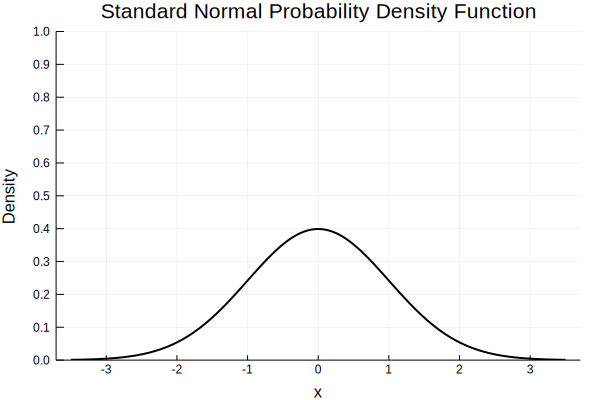

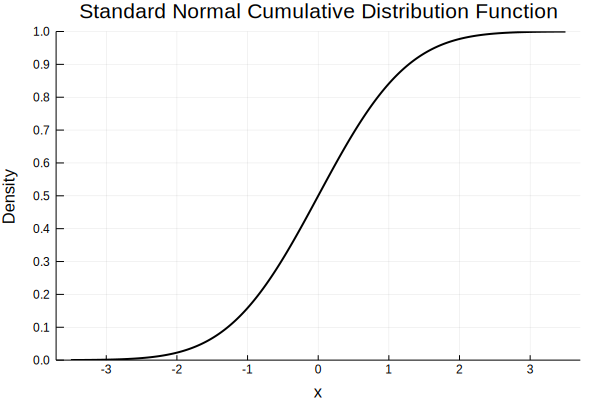

Standard normal PDF density at x = -1.96 is 0.05844094433345147
Standard normal PDF density at x = 0 is 0.3989422804014327
Standard normal PDF density at x = 1.96 is 0.05844094433345147
Standard normal CDF density at x = 1.337 is 0.9093886815817953


In [1]:
using Distributions
using Plots

mean = 0 #define the mean
sd = 1 #define the standard deviation

d = Normal(mean, sd) #initialise and define the normal distribution object using variables mean and sd (if no arguments, Normal() defaults to standard normal mean = 0 sd = 1)
#note that Normal() takes the standard deviation, not the variance!

x = -3.5:0.01:3.5 #the x axis is defined to be the range from -3.5 to 3.5 with step 0.01 
y1 = pdf(d, x) #probability density function applied to the normal distribution object returns an array of probabilities which is set to be the y axis

p1 = plot( #assign a plot object to the variable p using the following attributes
    x, #x series
    y1, #y series
    st = :line, #series type
    title = "Standard Normal Probability Density Function", #plot title
    label = "", #legend label
    xlabel = "x", #x axis label
    ylabel = "Density", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    lw = 2, #line size
    lc = :black #line color
)

y2 = cdf(d, x) #cumulative distribution function applied to the normal distribution object returns an array of probabilities which is set to be the y axis

p2 = plot( #assign a plot object to the variable p using the following attributes
    x, #x series
    y2, #y series
    st = :line, #series type
    title = "Standard Normal Cumulative Distribution Function", #plot title
    label = "", #legend label
    xlabel = "x", #x axis label
    ylabel = "Density", #y axis label
    ylims = (0, 1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    lw = 2, #line size
    lc = :black #line color
)

display(p1) #display the plot p1

density1 = pdf(d, -1.96) #define density1 as the standard normal pdf density at x = -1.96
density2 = pdf(d, 0) #define density2 as the standard normal pdf density at x = 0
density3 = pdf(d, 1.96) #define density3 as the standard normal pdf density at x = 1.96
print("Standard normal PDF density at x = -1.96 is " * string(density1) * "\n") #print density1
print("Standard normal PDF density at x = 0 is " * string(density2) * "\n") #print density2
print("Standard normal PDF density at x = 1.96 is " * string(density3) * "\n") #print density3

display(p2) #display the plot p2
density4 = cdf(d, 1.337) #define density4 as the standard normal cdf density at x = 1.337
print("Standard normal CDF density at x = 1.337 is " * string(density4) * "\n") #print density4

- When computing densities involving normal random variables $Y\sim N(\mu, \sigma^2)$ in some specific range, we must first standardise Y by  subtracting its mean and dividing by its standard deviation: 
\begin{equation}
Z = \frac{Y -\mu}{\sigma}
\end{equation}


- Let $c_1$ and $c_2$ denote two numbers whereby $c_1 < c_2$ and further $d_1 = (c_1 - \mu) / \sigma$ and $d_2 = (c_2 - \mu)/\sigma$. Then:

\begin{align*} 
P(Y \leq c_2) =& \, P(Z \leq d_2) = \Phi(d_2), \\ 
P(Y \geq c_1) =& \, P(Z \geq d_1) = 1 - \Phi(d_1), \\ 
P(c_1 \leq Y \leq c_2) =& \, P(d_1 \leq Z \leq d_2) = \Phi(d_2) - \Phi(d_1). 
\end{align*}


- This is implemented below for an example of $P(3 \leq Y \leq 4)$ where $Y \sim N(5, 25)$.

In [39]:
using Distributions

mean = 5 #define the mean
sd = sqrt(25) #define the standard deviation

d = Normal(mean, sd) #initialise and define the normal distribution object using variables mean and sd

c1 = 3
c2 = 4

density = cdf(d, c2) - cdf(d, c1) #calculate cdf(X <= 4) - cdf(X <= 3), the values of c1 and c2 are automatically standardised according to the mean and sd of the normal distribution object

print("P($c1 <= Y <= $c2) where Y ~ N($mean, $(sd^2)) is: " * string(density)) #print the result

P(3 <= Y <= 4) where Y ~ N(5, 25.0) is: 0.07616203217122114

### The Chi-Squared Distribution

- The sum of M squared independent standard normal distributed random variables follows a chi-squared distribution with M degrees of freedom:
\begin{align*}
Z_1^2 + \dots + Z_M^2 = \sum_{m=1}^M Z_m^2 \sim \chi^2_M \ \ \text{with} \ \ Z_m \overset{i.i.d.}{\sim} \mathcal{N}(0,1) 
\end{align*}
- A $\chi^2$ distributed random variable with $M$ degrees of freedom has expectation $M$, mode at $M - 2$ for $M \geq 2$ and variance $2 * M$.


- For example, for $Z_1,Z_2,Z_3 \overset{i.i.d.}{\sim} N(0,1)$ it holds that $Z_1^2+Z_2^2+Z_3^2 \sim \chi^2_3$.
- The PDF and the CDF of a $\chi^2_3$ random variable are plotted simultaneously below using the Chisq() function from the Distributions package.

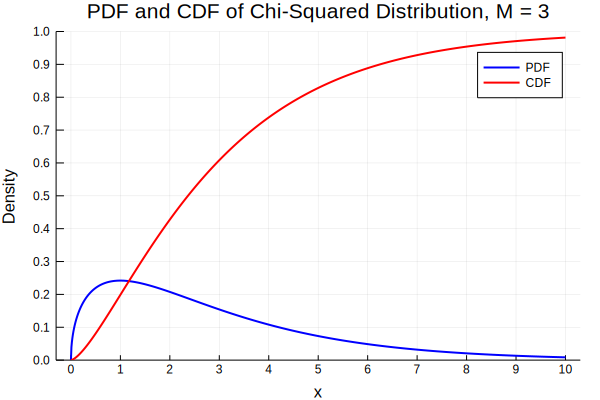

In [2]:
using Distributions
using Plots

k = 3 #define the degrees of freedom

d = Chisq(k) #initialise and define the chi-squared distribution object using degrees of freedom k

x = 0:0.01:10 #the x axis is defined to be the range from 0 to 10 with step 0.01 
y1 = pdf(d, x) #probability density function applied to the chi-squared distribution object returns an array of probabilities which is set to be the y axis

p1 = plot( #assign a plot object to the variable p using the following attributes
    x, #x series
    y1, #y series
    st = :line, #series type
    title = "PDF and CDF of Chi-Squared Distribution, M = 3", #plot title
    label = "PDF", #legend label
    xlabel = "x", #x axis label
    xticks = 0:1:10, #x axis tick range
    ylabel = "Density", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    lw = 2, #line size
    lc = :blue #line color
)

y2 = cdf(d, x) #cumulative distribution function applied to the chi-squared distribution object returns an array of probabilities which is set to be the y axis

plot!( #modify the current plot object p1 using the following attributes
    x, #x series
    y2, #y series
    label = "CDF", #legend label
    lw = 2, #line size
    lc = :red #line color
)

display(p1) #display the plot p1


- As expectation and variance depend solely on the degrees of freedom, the distribution’s shape changes drastically if we vary the number of squared standard normals that are summed up. 
- As simulated in the plot below, increasing the degrees of freedom shifts the distribution to the right (increases the mode) and increases the dispersion (the distribution’s variance).

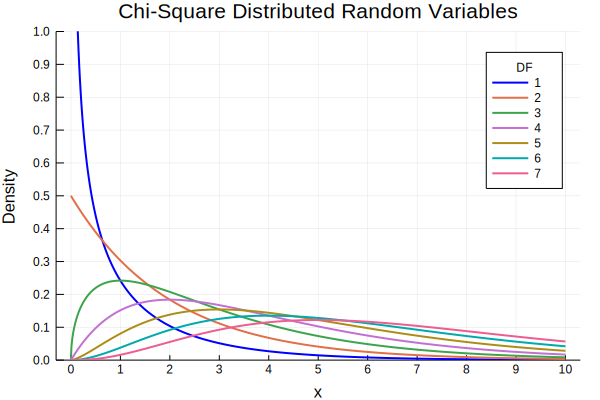

In [24]:
using Distributions
using Plots

k = 1 #define the degrees of freedom

d = Chisq(k) #initialise and define the chi-squared distribution object using degrees of freedom k

x = 0:0.01:10 #the x axis is defined to be the range from 0 to 10 with step 0.01 
y1 = pdf(d, x) #probability density function applied to the chi-squared distribution object returns an array of probabilities which is set to be the y axis

p1 = plot( #assign a plot object to the variable p using the following attributes
    x, #x series
    y1, #y series
    st = :line, #series type
    title = "Chi-Square Distributed Random Variables", #plot title
    legendtitle = "DF",
    label = k, #legend label
    xlabel = "x", #x axis label
    xticks = 0:1:10, #x axis tick range
    ylabel = "Density", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    lw = 2, #line size
    lc = :blue #line color
)

for k in 2:7 #for degrees of freedom k from range 2 to 7
    d = Chisq(k) #initialise and define the chi-squared distribution object using degrees of freedom k
    y2 = pdf(d, x) #probability density function applied to the chi-squared distribution object returns an array of probabilities which is set to be the y axis

    plot!( #modify the current plot object p1 using the following attributes
        x, #x series
        y2, #y series
        label = k, #legend label
        lw = 2, #line size
        lc = k #line color
    )
end

display(p1) #display the plot p1


### The Student t Distribution

- If $Z$ is a standard normal variate, $W$ is a $\chi^2_M$ random variable and $Z$ and $W$ are independent, then $X$ follows a Student t distribution (or simply t distribution) with $M$ degrees of freedom:
\begin{equation}
\frac{Z}{\sqrt{W/M}} =:X \sim t_M
\end{equation}
- Similar to the$\chi^2_M$ distribution, the shape of a $t_M$ distribution depends on $M$. 
- A $t_M$ distributed random variable $X$ has an expectation of 0 if $M > 1$ and it has a variance if $M > 2$.
\begin{align}
  E(X) =& 0, \ M>1 \\
  \text{Var}(X) =& \frac{M}{M-2}, \ M>2
\end{align}
- t distributions are symmetric, bell-shaped and approximate the normal distribution, especially when $M$ is large ($M \geq 30$). 
- In fact, the $t_\infty$ distribution is the standard normal distribution, as shown by the model below.

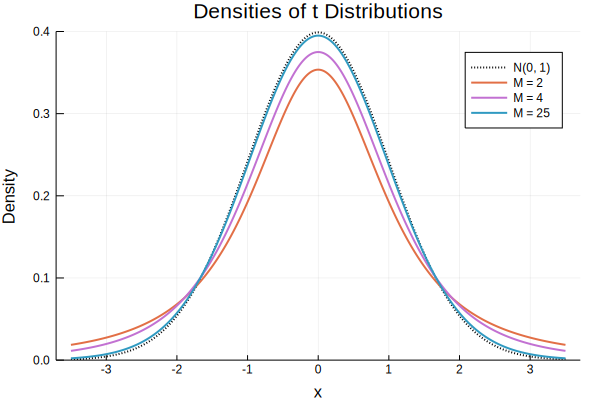

In [17]:
using Distributions
using Plots

mean = 0 #define the mean
sd = 1 #define the standard deviation

d = Normal(mean, sd) #initialise and define the normal distribution object using variables mean and sd (if no arguments, Normal() defaults to standard normal mean = 0 sd = 1)
#note that Normal() takes the standard deviation, not the variance!

x = -3.5:0.01:3.5 #the x axis is defined to be the range from -3.5 to 3.5 with step 0.01 
y1 = pdf(d, x) #probability density function applied to the normal distribution object returns an array of probabilities which is set to be the y axis

p1 = plot( #assign a plot object to the variable p using the following attributes
    x, #x series
    y1, #y series
    st = :line, #series type
    title = "Densities of t Distributions", #plot title
    label = "N(0, 1)", #legend label
    xlabel = "x", #x axis label
    ylabel = "Density", #y axis label
    ylims = (0,0.4), #y axis limits
    yticks = 0:0.1:0.4, #y axis tick range
    lw = 2, #line size
    lc = :black, #line color
    ls = :dot    
)

for k in [2, 4, 25] #for degrees of freedom k 2, 4, and 25
    d = TDist(k) #initialise and define the t distribution object using degrees of freedom k
    y2 = pdf(d, x) #cumulative distribution function applied to the t distribution object returns an array of probabilities which is set to be the y axis

    plot!( #modify the current plot object p1 using the following attributes
        x, #x series
        y2, #y series
        label = "M = $k", #legend label
        lw = 2, #line size
        lc = k #line color
    )
end

display(p1) #display the plot p1

### The F Distribution

- The ratio of two independent $\chi^2$ distributed random variables that are divided by their degrees of freedom $M$ and $n$ follows an $F$ distribution with numerator degrees of freedom $M$ and denominator degrees of freedom $n$, denoted $F_{M,n}$.

\begin{equation}
\frac{W/M}{V/n} \sim F_{M,n} \ \ \text{with} \ \ W \sim \chi^2_M \ \ , \ \ V \sim \chi^2_n
\end{equation}

- An important special case encountered in econometrics arises if the denominator degrees of freedom are large such that the $F_{M,n}$ distribution can be approximated by the $F_{M,\infty}$ distribution which turns out to be simply the distribution of a $\chi^2_M$ random variable divided by its degrees of freedom $M$.

\begin{equation}
W/M \sim F_{M,\infty} \ \ , \ \ W \sim \chi^2_M.
\end{equation}


- Below is an example of the PDF of an $F$ distributed random variable with numerator degrees of freedom 3 and denominator degrees of freedom 14; the orange fill represents $P(Y \geq 2)$.

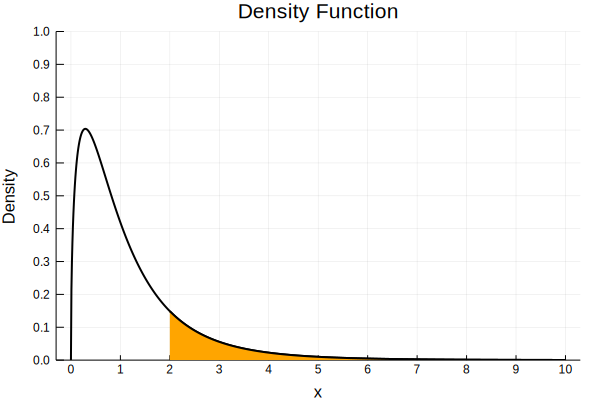

In [48]:
using Distributions
using Plots

numDF = 3
denomDF = 14

d = FDist(numDF, denomDF)

x = 0:0.01:10 #the x axis is defined to be the range from 0 to 10 with step 0.01 
y1 = pdf(d, x) #probability density function applied to the F distribution object returns an array of probabilities which is set to be the y axis

p1 = plot( #assign a plot object to the variable p using the following attributes
    x, #x series
    y1, #y series
    st = :line, #series type
    title = "Density Function", #plot title
    label = "", #legend label
    xlabel = "x", #x axis label
    xticks = 0:1:10, #x axis tick range
    ylabel = "Density", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    lw = 2, #line size
    lc = :black, #line color
)

x2 = 2:0.01:10
y2 = pdf(d, x2) #probability density function applied to the F distribution object returns an array of probabilities which is set to be the y axis

plot!( #assign a plot object to the variable p using the following attributes
    x2, #x series
    y2, #y series
    st = :line, #series type
    label = "", #legend label
    lw = 2, #line size
    lc = :black, #line color
    fillrange = 0,
    fillcolor = :orange
)
